In [1]:
import osmnx as ox
import networkx as nx

/Users/pedroiMac/anaconda3/envs/osmnx/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import numpy as np

import json
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Información de las estaciones

Buscando en los archivos que https://www.ecobici.cdmx.gob.mx/es/mapa-de-cicloestaciones necesita, encontramos el archivo getJsonObject.json que contiene la información de todas las estaciones de Ecobici. Lo renombramos ecobici_stations.json, lo leemos y lo modificamos un poco.

In [4]:
ecobici_stations = pd.read_json("ecobici_stations.json")

In [5]:
ecobici_stations.set_index('id', inplace=True)

In [6]:
ecobici_stations.head()

address addressNumber  bikes district  \
id                                                                      
1             001 - Río Sena-Río Balsas           S/N     26      CUA   
2   002 - Río Guadalquivir - Río Balsas           S/N      2      CUA   
3           003 - Reforma - Insurgentes           S/N     22        1   
4           004 - Río Nilo - Río Panuco           S/N      7      CUA   
5            005 - Río Pánuco Río Tiber           S/N      6      CUA   

          lat        lon                           name nearbyStations  slots  \
id                                                                              
1   19.433571 -99.167809          1 RIO SENA-RIO BALSAS         3,8,85      1   
2   19.431386 -99.171695  2 RIO GUADALQUIVIR-RIO BALSAS            1,5     10   
3   19.431655 -99.158668          3 REFORMA-INSURGENTES        8,20,86     14   
4   19.428309 -99.171713          4 RIO NILO-RIO PANUCO       5,8,9,10      9   
5   19.429720 -99.169363         5 RIO PANUCO-RIO TIBER       2,4,9,10      5   

   stationType status     zip  
id                             
1     BIKE,TPV    OPN  6500.0  
2         BIKE    OPN  6500.0  
3     BIKE,TPV    OPN  6500.0  
4         BIKE    OPN  6500.0  
5         BIKE    OPN  6500.0

In [7]:
no_stations = len(ecobici_stations)

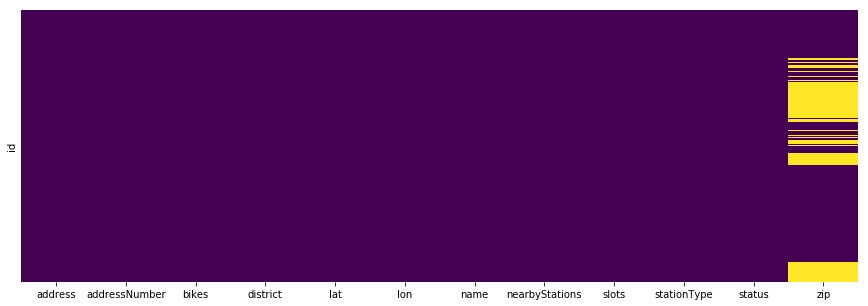

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(ecobici_stations.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

# Mapa de las delegaciones en que existe la red de Ecobici

La red de Ecobici abarca sólo unas cuantas delegaciones de la CDMX: Cuauhtémoc, Benito Juárez y Miguel Hidalgo. Entonces le pedimos a OpenStreetMap a través de osmnx que nos muestre únicamente el mapa de esas delegaciones.

In [9]:
# delegaciones en las que hay cobertura de ECOBICI.
delegaciones = ['Cuauhtemoc, Mexico City, Mexico',
                'Benito Juárez, Mexico City, Mexico',
                'Miguel Hidalgo, Mexico City, Mexico']
ecobici_zone = ox.graph_from_place(delegaciones)

Cargamos los nodos más cercanos a cada una de las estaciones como las únicas ubicaciones aproximadas que osmnx le puede asignar a las estaciones.

In [10]:
ecobici_stations['node'] = ecobici_stations[['lat','lon']].apply(lambda location: ox.get_nearest_node(ecobici_zone,tuple(location)), axis = 1)

In [11]:
ecobici_nodes = pd.Series(ecobici_zone.nodes)

In [12]:
ecobici_stations.head()

address addressNumber  bikes district  \
id                                                                      
1             001 - Río Sena-Río Balsas           S/N     26      CUA   
2   002 - Río Guadalquivir - Río Balsas           S/N      2      CUA   
3           003 - Reforma - Insurgentes           S/N     22        1   
4           004 - Río Nilo - Río Panuco           S/N      7      CUA   
5            005 - Río Pánuco Río Tiber           S/N      6      CUA   

          lat        lon                           name nearbyStations  slots  \
id                                                                              
1   19.433571 -99.167809          1 RIO SENA-RIO BALSAS         3,8,85      1   
2   19.431386 -99.171695  2 RIO GUADALQUIVIR-RIO BALSAS            1,5     10   
3   19.431655 -99.158668          3 REFORMA-INSURGENTES        8,20,86     14   
4   19.428309 -99.171713          4 RIO NILO-RIO PANUCO       5,8,9,10      9   
5   19.429720 -99.169363         5 RIO PANUCO-RIO TIBER       2,4,9,10      5   

   stationType status     zip        node  
id                                         
1     BIKE,TPV    OPN  6500.0    49593133  
2         BIKE    OPN  6500.0  1409454632  
3     BIKE,TPV    OPN  6500.0  3306289639  
4         BIKE    OPN  6500.0    35341405  
5         BIKE    OPN  6500.0    35341409

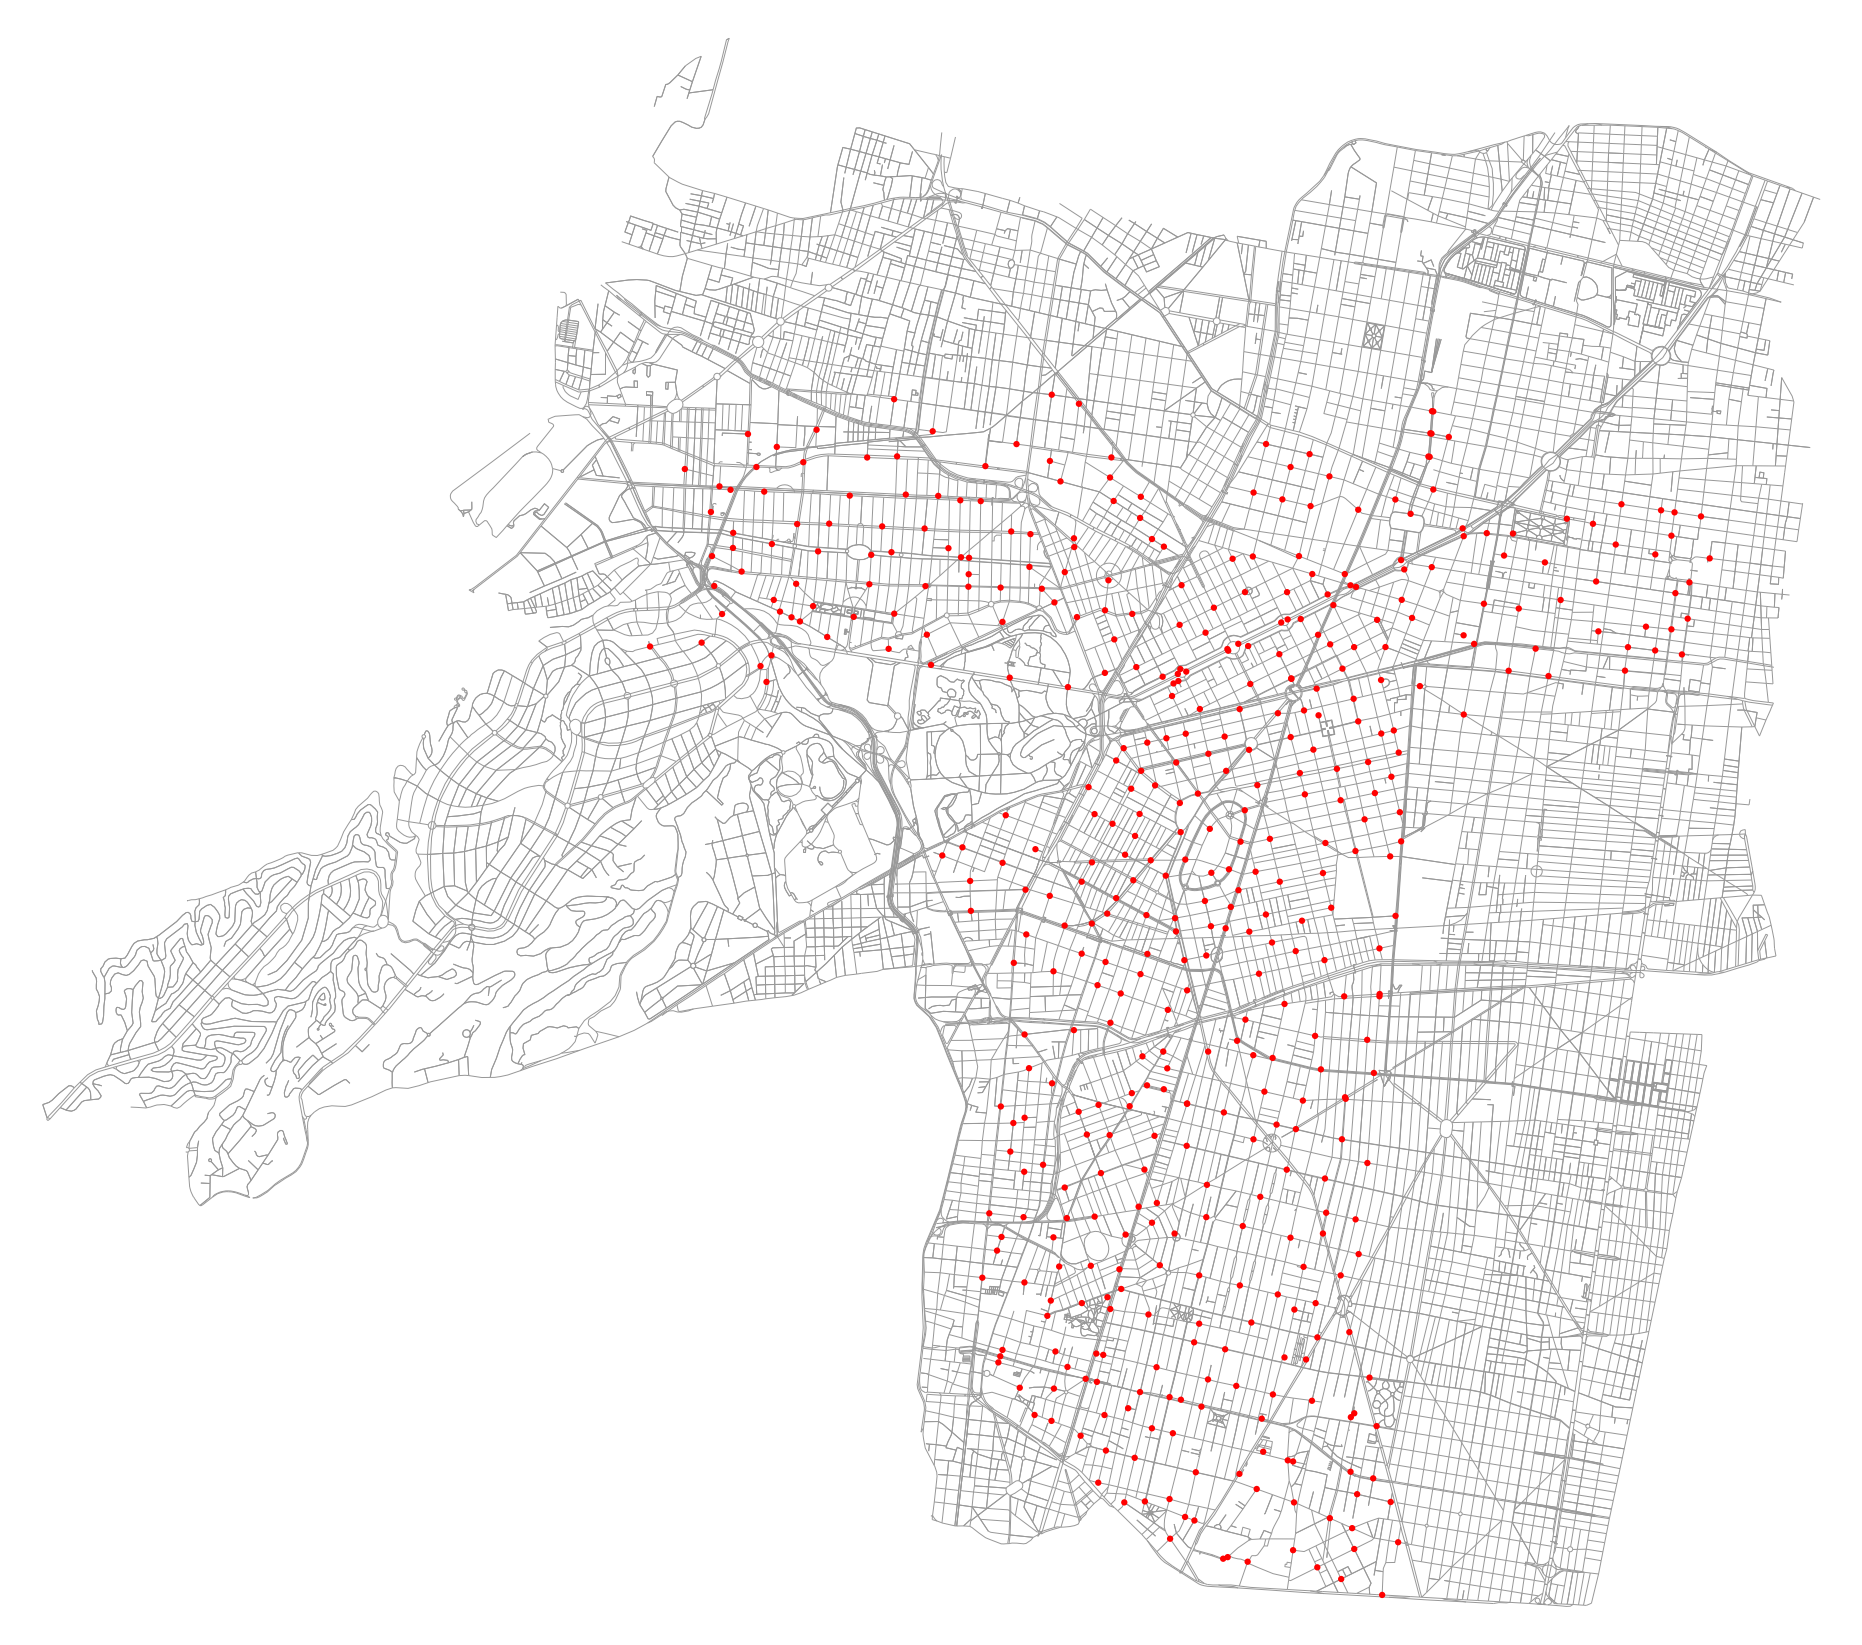

(<Figure size 2596x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12e106e80>)

In [13]:
nc = np.where(ecobici_nodes.isin(ecobici_stations['node']),'r','g')
ns = np.where(ecobici_nodes.isin(ecobici_stations['node']),40,0)

ox.plot_graph(ecobici_zone, fig_height=30, node_size=ns, node_color=nc, node_zorder=2)

# Viajes

In [14]:
travels = pd.read_csv('2018-09.csv')

In [15]:
travels.head()

Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M            72   4025                    401   01/09/2018   
1              M            30   9367                     72   01/09/2018   
2              M            29  10220                     35   01/09/2018   
3              M            26  10619                     86   01/09/2018   
4              M            21   3882                    185   01/09/2018   

  Hora_Retiro  Ciclo_Estacion_Arribo Fecha_Arribo Hora_Arribo  
0     0:00:03                    158   01/09/2018     0:43:22  
1     0:00:11                    233   01/09/2018     0:23:41  
2     0:00:22                    299   01/09/2018     0:19:33  
3     0:00:25                    470   01/09/2018     0:10:52  
4     0:00:28                    188   01/09/2018     0:07:22

In [16]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701049 entries, 0 to 701048
Data columns (total 9 columns):
Genero_Usuario           701049 non-null object
Edad_Usuario             701049 non-null int64
Bici                     701049 non-null int64
Ciclo_Estacion_Retiro    701049 non-null int64
Fecha_Retiro             701049 non-null object
Hora_Retiro              701049 non-null object
Ciclo_Estacion_Arribo    701049 non-null int64
Fecha_Arribo             701049 non-null object
Hora_Arribo              701049 non-null object
dtypes: int64(4), object(5)
memory usage: 48.1+ MB


In [17]:
travels['Genero_Usuario'] = travels.Genero_Usuario.astype('category')

Eliminamos información erronea

In [18]:
travels.drop(travels[travels['Ciclo_Estacion_Arribo'] > no_stations].index, inplace=True)
travels.drop(travels[travels['Ciclo_Estacion_Retiro'] > no_stations].index, inplace=True)

In [19]:
travels['Fecha_Hora_Arribo'] = (travels['Fecha_Arribo'] + ' ' + travels['Hora_Arribo']).apply(pd.Timestamp)
travels['Fecha_Hora_Retiro'] = (travels['Fecha_Retiro'] + ' ' + travels['Hora_Retiro']).apply(pd.Timestamp)
travels['Tiempo_Transcurrido']  = (travels['Fecha_Hora_Arribo'] 
                                   - travels['Fecha_Hora_Retiro']).astype('timedelta64[s]')

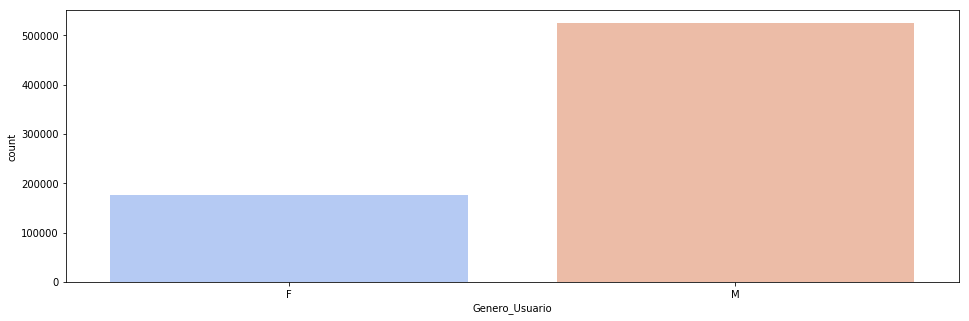

In [42]:
plt.figure(figsize=(16,5))
sns.countplot(travels['Genero_Usuario'], palette='coolwarm')

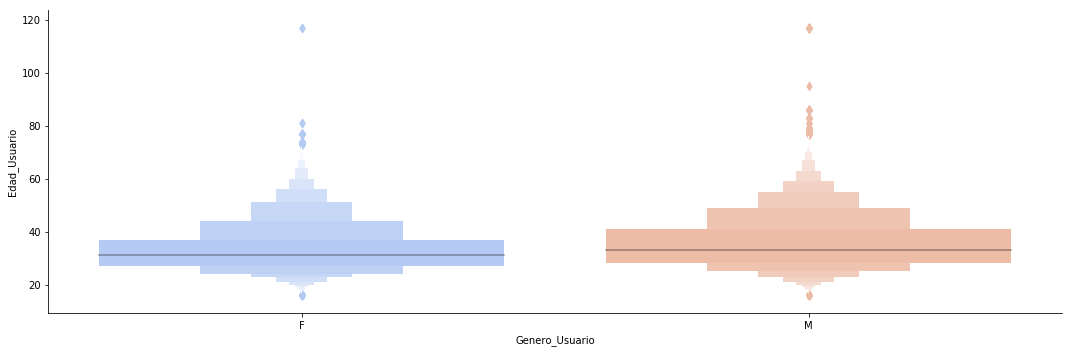

In [43]:
sns.catplot(x = 'Genero_Usuario', y = 'Edad_Usuario', data = travels, 
            height = 5, aspect=3, kind = 'boxen', palette = 'coolwarm')

El tiempo máximo de uso es 45 minutos (2700 segundos)

No handles with labels found to put in legend.


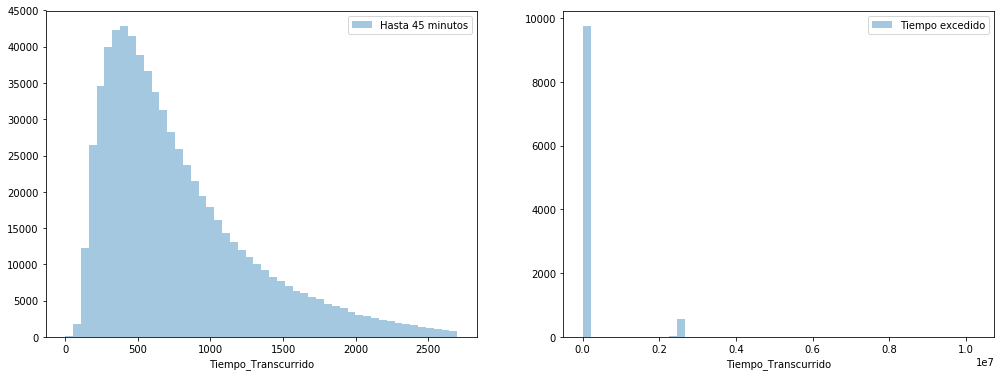

In [47]:
f, ax = plt.subplots(1, 2, figsize=(17, 6))
sns.distplot(travels['Tiempo_Transcurrido'], kde=False, rug=False, ax=ax[0],
             hist_kws={"range": [0,2700]}, label = 'Hasta 45 minutos')
plt.legend()
sns.distplot(travels['Tiempo_Transcurrido'], kde=False, rug=False, ax=ax[1],
             hist_kws={"range": [2700,travels['Tiempo_Transcurrido'].max()]}, label = 'Tiempo excedido')
ax[0].legend()
ax[1].legend()

In [48]:
travels_by_origin_destination = travels.groupby(['Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo'])
travels_by_destination_origin = travels.groupby(['Ciclo_Estacion_Arribo', 'Ciclo_Estacion_Retiro'])

In [49]:
class station_network(object):
    """
    A network is constructed around a particular station to all other stations to which a travel has been made
    """
    
    def __init__(self,station_id):
        self.station_id = station_id
        self.station_node = ecobici_stations.loc[self.station_id]['node']
    
    
    def shortest_path(self, destination_id):
        destination_node = ecobici_stations.loc[destination_id]['node']
        return nx.shortest_path(ecobici_zone, self.station_node, destination_node)
    
    
    def plot_shortest_path(self, destination_id, truncate = True):
        destination_node = ecobici_stations.loc[destination_id]['node']
        path = self.shortest_path(destination_id)
        
        if truncate:
            path_coords_x = [ecobici_zone.node[node]['x'] for node in some_station.shortest_path(destination_id)]
            path_coords_y = [ecobici_zone.node[node]['y'] for node in some_station.shortest_path(destination_id)]
            
            north = max(path_coords_y)
            south = min(path_coords_y)
            east = max(path_coords_x)
            west = min(path_coords_x)
            
            temp_graph = ox.truncate_graph_bbox(ecobici_zone, north = north, south = south, east = east, west = west)
            
        else:
            temp_graph = ecobici_zone
        
        ox.plot_graph_route(temp_graph, path, fig_height = 30, node_size = 0)
        
        return None
    
    
    def connections(self):
        """
        DataFrame containing data of all stations to which a travel has been made
        """
        des_list = []
        ori_list = []

        for destination_id in range(1,no_stations+1):
            if (self.station_id,destination_id) in travels_by_origin_destination.groups:
                current_group = travels_by_origin_destination.get_group((self.station_id,destination_id))
                des_list.append([destination_id,
                                 ecobici_stations['node'].loc[destination_id],
                                 current_group['Bici'].count(),
                                 current_group['Tiempo_Transcurrido'].mean(),
                                 ox.utils.great_circle_vec(*tuple(ecobici_stations.loc[self.station_id][['lat','lon']]),
                                                           *tuple(ecobici_stations.loc[destination_id][['lat','lon']]))])
        
        for origin_id in range(1,no_stations+1):
            if (self.station_id, origin_id) in travels_by_destination_origin.groups:
                current_group = travels_by_destination_origin.get_group((self.station_id, origin_id))
                ori_list.append([origin_id,
                                 ecobici_stations['node'].loc[origin_id],
                                 current_group['Bici'].count(),
                                 current_group['Tiempo_Transcurrido'].mean(),
                                 ox.utils.great_circle_vec(*tuple(ecobici_stations.loc[self.station_id][['lat','lon']]),
                                                           *tuple(ecobici_stations.loc[origin_id][['lat','lon']]))])

        return (pd.DataFrame(des_list, columns = ['Destino','node','Numero de Viajes','Tiempo medio','Distancia']),
                pd.DataFrame(ori_list, columns = ['Origen','node','Numero de Viajes','Tiempo medio','Distancia']))

    
    def connections_subgraph(self, destination = True, origin = True):
        connection_des, connection_ori = self.connections()
        if destination and origin:
            connections_nodes = pd.concat([connection_des['node'], connection_ori['node']])
        elif destination:
            connections_nodes = connection_des['node']
        elif origin:
            connections_nodes = connection_ori['node']
            
        if connections_nodes.shape[0] == 0:
            temp_graph = ox.truncate_graph_dist(ecobici_zone, self.station_node, 1000)
            
        else:    
            connections_data_x_coords = [ecobici_zone.node[node]['x'] for node in connections_nodes]
            connections_data_x_coords.append(ecobici_zone.node[self.station_node]['x'])
            connections_data_y_coords = [ecobici_zone.node[node]['y'] for node in connections_nodes]
            connections_data_y_coords.append(ecobici_zone.node[self.station_node]['y'])
        
            north = max(connections_data_y_coords)
            south = min(connections_data_y_coords)
            east = max(connections_data_x_coords)
            west = min(connections_data_x_coords)

            temp_graph = ox.truncate_graph_bbox(ecobici_zone, north = north, south = south, east = east, west = west, truncate_by_edge = True)

        return temp_graph

    
    def plot_connections(self, truncate = True, destination = True, origin = True):
        connection_des, connection_ori = self.connections()
        if truncate:
            current_graph = self.connections_subgraph(destination, origin)
        else:
            current_graph = ecobici_zone

        graph_nodes = pd.Series(current_graph.nodes)
        #print(graph_nodes)

        nc = ['gray']*len(graph_nodes)
        ns = [0]*len(graph_nodes)

        for index, node in connection_des.iterrows():
            node_index = graph_nodes[graph_nodes==node['node']].index[0]
            nc[node_index] = 'blue'
            ns[node_index] = node['Numero de Viajes']
            
        for index, node in connection_ori.iterrows():
            node_index = graph_nodes[graph_nodes==node['node']].index[0]
            if nc[node_index] == 'blue':
                nc[node_index] = 'brown'
            else:
                nc[node_index] = 'green'
            ns[node_index] = ns[node_index] + node['Numero de Viajes']

        node_center = ecobici_stations['node'].loc[self.station_id]
        nc[graph_nodes[graph_nodes==node_center].index[0]] = 'orange'
        ns[graph_nodes[graph_nodes==node_center].index[0]] = 100

        ox.plot_graph(current_graph, fig_height=30, node_size=ns, node_color=nc, node_zorder=2)
        return None
    
    def activity(interval = 'day')

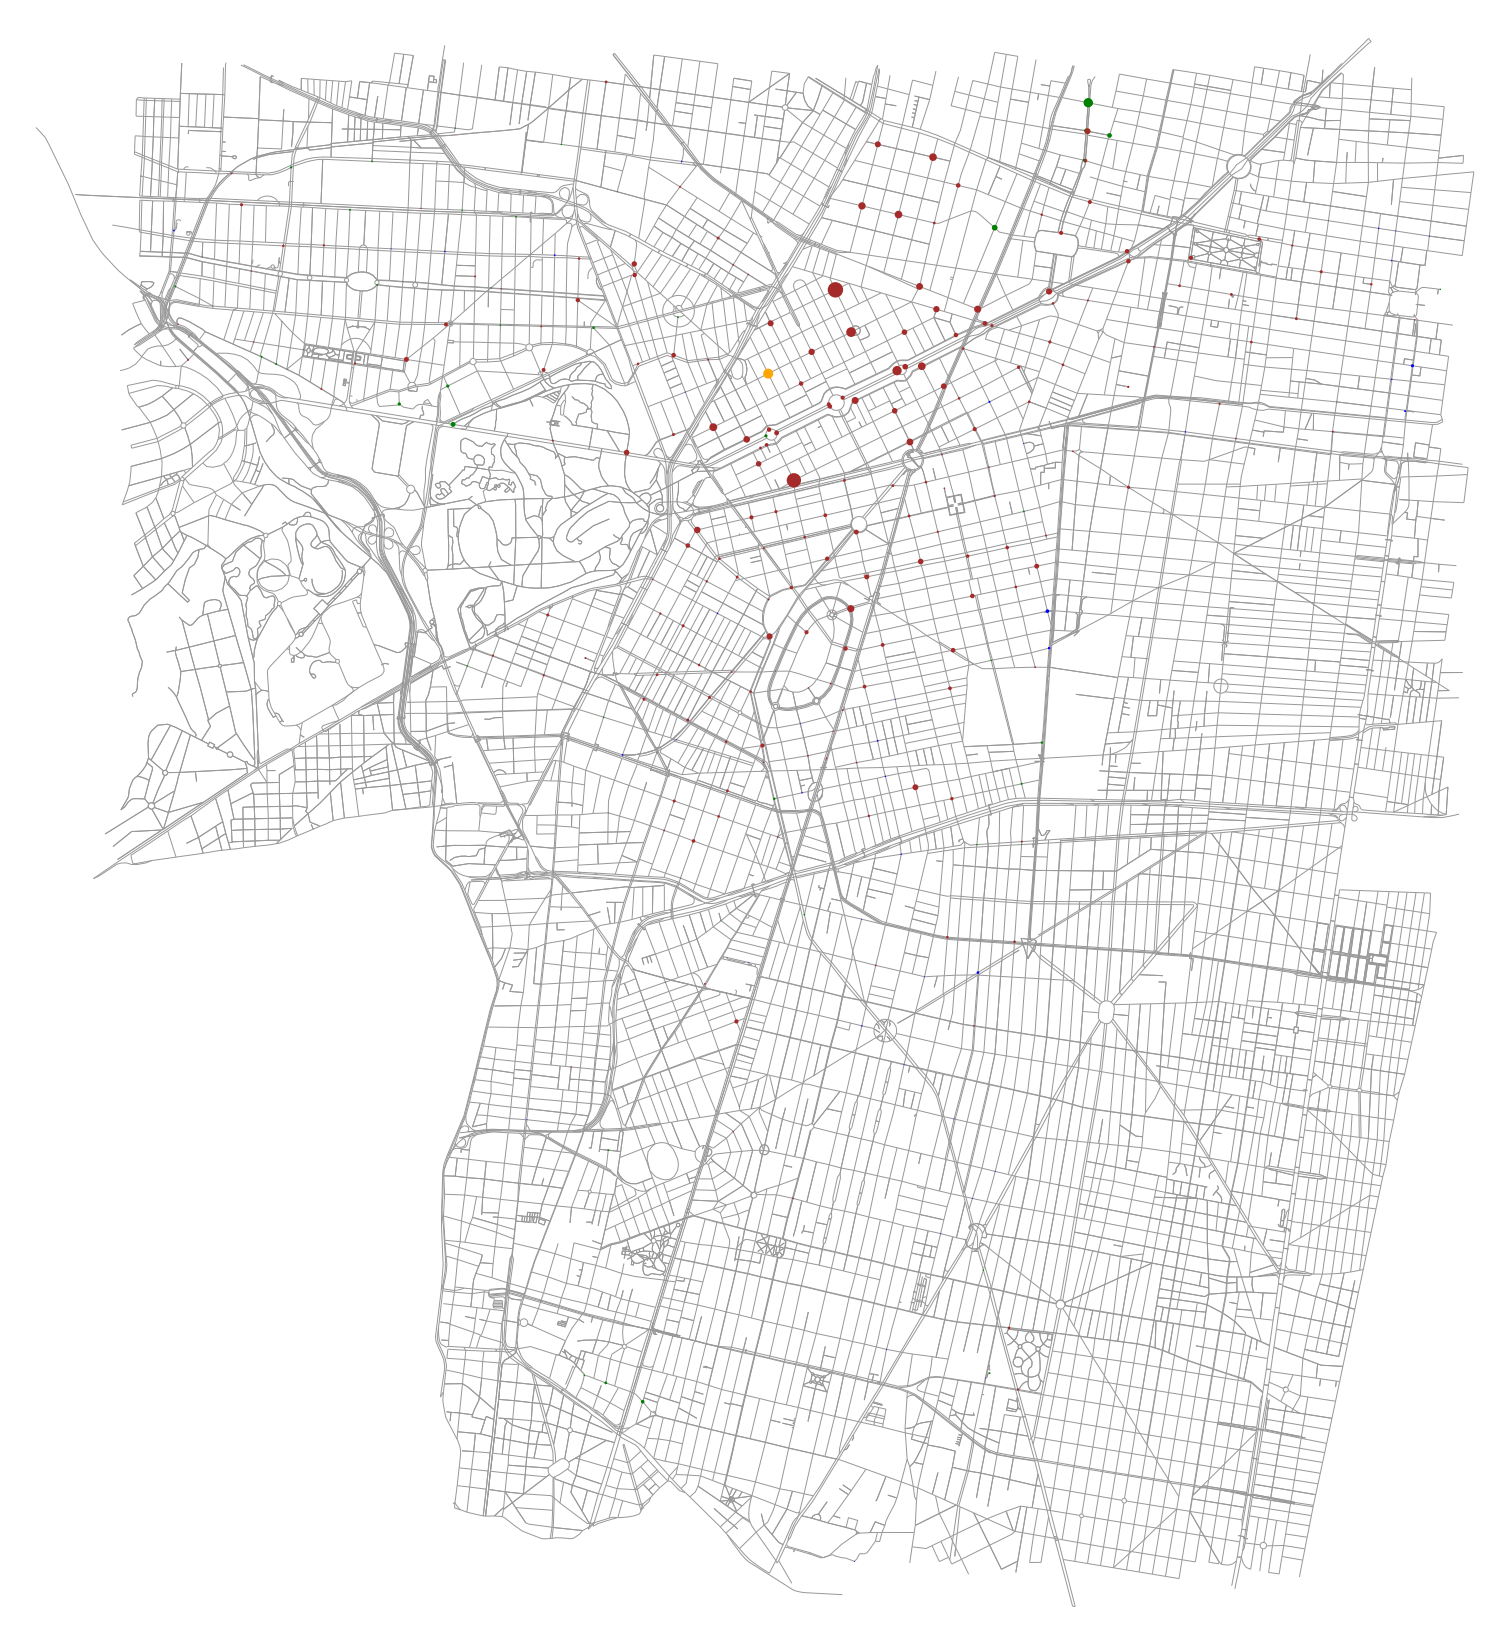

In [50]:
some_station = station_network(4)
some_station.plot_connections()